In [5]:
# First step - import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Second step - load data from CSV

df2 = pd.read_csv('GraduateSampleNua2017.csv')
df2.head()

,Unnamed: 0,Year of Entry,Gender Long,LC Points Range 1,LC Points Range 2,DEIS_OR_FEE_PAYING_DESC,High Qual Desc,Age Group,Institute Type,Year of Graduation,Non Standard Award Desc,Field of Study,Grade Desc,Score,Number of years,Institute Alternative Name
0,0,2012/2013,Female,305 to <355,medium points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
1,1,2012/2013,Female,305 to <355,medium points,Neither,NaN,18,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
2,2,2012/2013,Female,405 to <455,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,1st Class Honours,85.0,4,College 5
3,3,2012/2013,Male,455 to <505,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
4,4,2012/2013,Female,205 to <255,medium points,Neither,NaN,22,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,3rd Class Honours,44.5,4,College 5


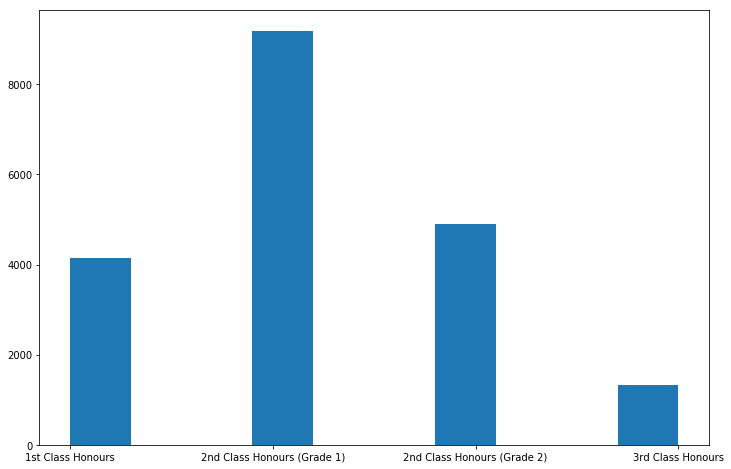

In [13]:
# what is the overall distribution of grades of this dataset?
# Please remember that we do not have actual scores, only grades, 
# replaced with the median score of the grade (e.g 85 for a first etc)

plt.figure(figsize=(12, 8))
plt.hist(df2['Grade Desc'])
plt.show()

In [7]:
# Would it be accurate to describe this as a normal distribution?

# What is the standard deviation of the grade Desc column?

df2.describe()


,Unnamed: 0,Year of Graduation,Score,Number of years
count,19581.000000,19581.0,19581.000000,19581.000000
mean,10029.585261,2017.0,64.980389,3.145907
std,5827.946811,0.0,11.884014,0.353022
min,0.000000,2017.0,44.500000,3.000000
25%,5005.000000,2017.0,54.500000,3.000000
50%,9930.000000,2017.0,64.500000,3.000000
75%,14946.000000,2017.0,64.500000,3.000000
max,20642.000000,2017.0,85.000000,4.000000


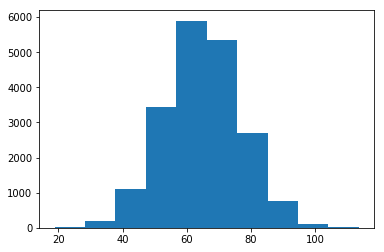

In [14]:
# So  .... lets try to recreate the above by using numpy.random.normal, using the count, mean and std deviation, as derived
# from the above 

# To recap, The numpy.random.normal() function draws random samples from a normal (Gaussian) distribution.

# The function takes 3 values:

 
#   loc: the mean or "centre" of the distribution
#   scale: the standard deviation of the distribution
#   size: the number of samples

x = np.random.normal(64.980389, 11.884014, 19581)
plt.hist(x)
plt.show()


Clearly, a normal distribution is an inappropriate model here.

OR IS IT?

Revisited 13/12/2018

why dont' we group the randomly generated scores into grades and them plot ... and play with the parameters to see if we can (admittedlty through trial and error rather than strict scientific method, roughly replicate the overall distribution of grades.


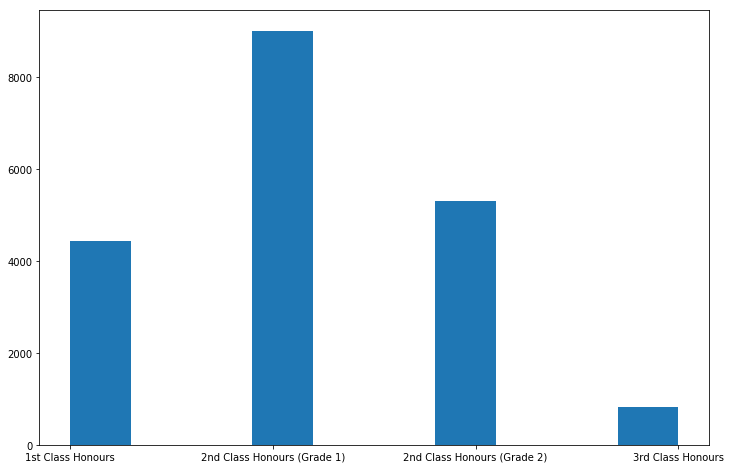

In [54]:
# (1) Function 'grade' to allocate grade based on score

def grade(x):
    if x > 69:
        return '1st Class Honours'
    elif x > 59:
        return '2nd Class Honours (Grade 1)'
    elif x > 49:
        return '2nd Class Honours (Grade 2)'
    else:
        return '3rd Class Honours'

# (2) Generate numpy array random examination scores 
    
scores = np.random.normal(63, 8, 19581) # lets play with the paramenters

# (3) Using list comprehension, create a new array by calling the grade function to assign a grade to each member of the
# scores array
grades = [grade(x) for x in scores]

# (4) plot a histogram showing the distribution of grades from the randomly generated numbers

plt.figure(figsize=(12, 8))
plt.hist(grades)
plt.show()

Lets investigate the distribution of grades by gender and see if there is any variation in the pattern ...

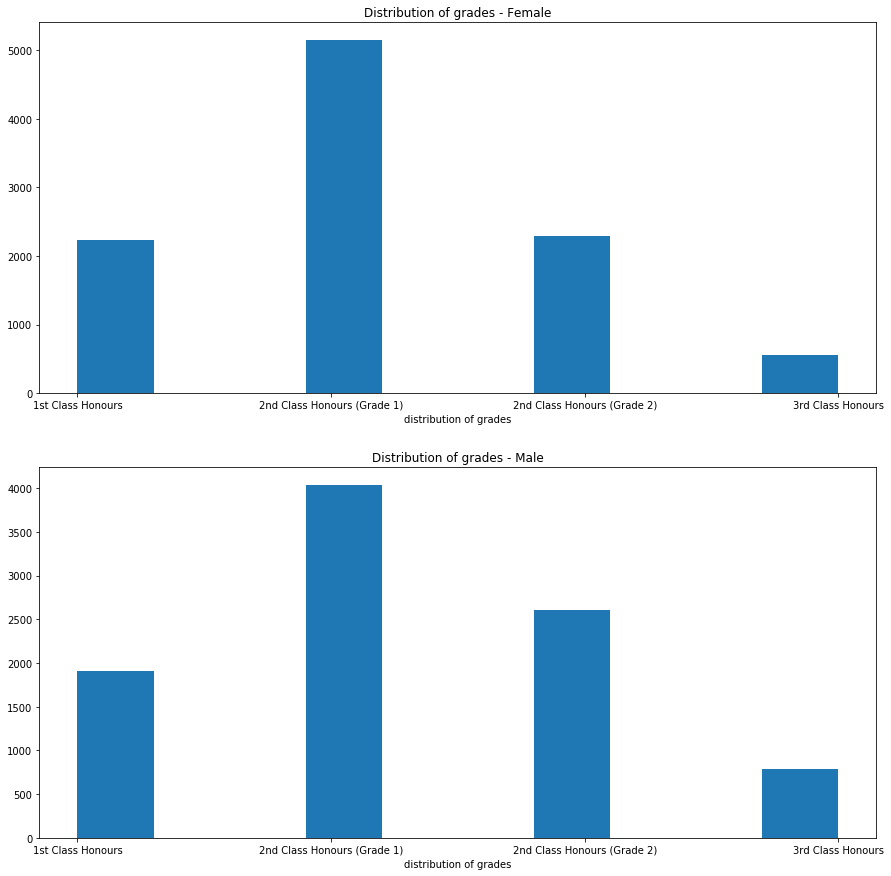

In [15]:
female = df2[df2['Gender Long'] == 'Female']
male = df2[df2['Gender Long'] == 'Male']

plt.figure(figsize=(15, 15)) # This sets the size of the individual plots 


plt.subplot(2,1,1)
plt.hist(female['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Female")

plt.subplot(2,1,2)
plt.hist(male['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Male")

plt.savefig('Gender.pdf') # output plots as a single pdf

plt.show()

From the above, there is no significcant variation in the distribution of grades by gender (if anything, there seems  to be a small variance within the two second class honours grades, with the females doing slighlty better here with 50% of them getting a 2:1 compared to 42% of males. Nevertheless, there is only a 1% difference in terms of Firsts and Third class honours.

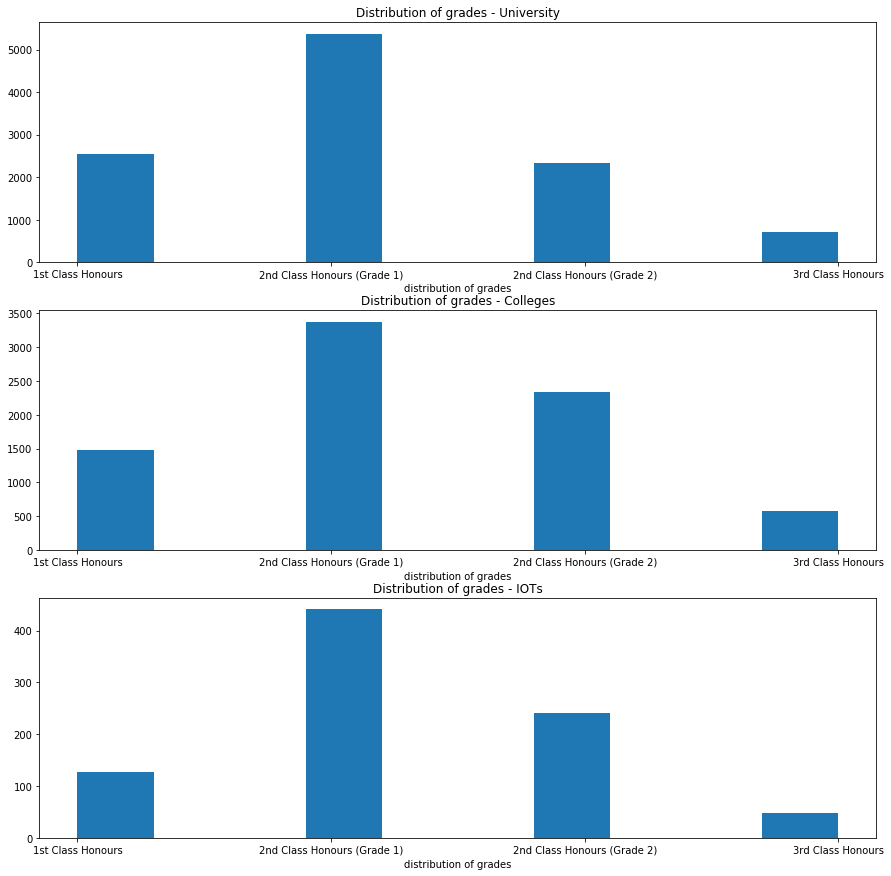

In [10]:
# What about distribution by type of college?
University = df2[df2['Institute Type'] == 'Universities']
Colleges = df2[df2['Institute Type'] == 'Institutes of Technology']
IOT = df2[df2['Institute Type'] == 'Colleges']

plt.figure(figsize=(15, 15)) # This sets the size of the individual plots 

plt.subplot(3,1,1)
plt.hist(University['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - University")

plt.subplot(3,1,2)
plt.hist(Colleges['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Colleges")

plt.subplot(3,1,3)
plt.hist(IOT['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - IOTs")

plt.savefig('Type of Institution.pdf') # output plots as a single pdf

plt.show()


There are some samll variances here. For example, the colleges sector have a lower proportion of firsts, but proportionally the greater number of 2:1s and indeed the largest proportionally of combined second class honours.

Nevertheless, the broad shape of the distribution is the same for each sector.



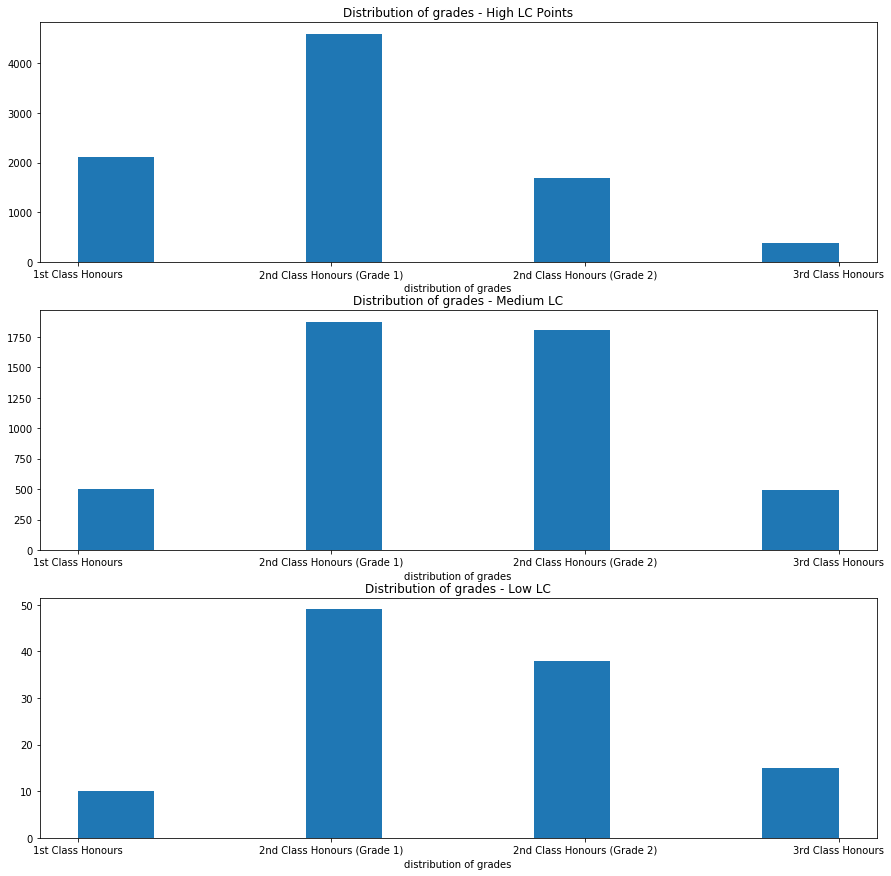

In [11]:
# LC points range

high = df2[df2['LC Points Range 2'] == 'high points']
medium = df2[df2['LC Points Range 2'] == 'medium points']
low = df2[df2['LC Points Range 2'] == 'low points']

plt.figure(figsize=(15, 15)) # This sets the size of the individual plots 

plt.subplot(3,1,1)
plt.hist(high['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - High LC Points")

plt.subplot(3,1,2)
plt.hist(medium['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Medium LC")

plt.subplot(3,1,3)
plt.hist(low['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Low LC")

plt.savefig('Leaving Cert Points Range.pdf') # output plots as a single pdf

plt.show()

Here we start to see a departure - for those students entering with low LC points, they are the only group where the proportion of 3rds is greater than than of those with firsts. **Note however that they are a relatively low component of this cohort**

If anything, those with medium and low points start to approxiamte a normal distribution, whereas those with high points conform to the distribution of grades in the HE sector as a whole.

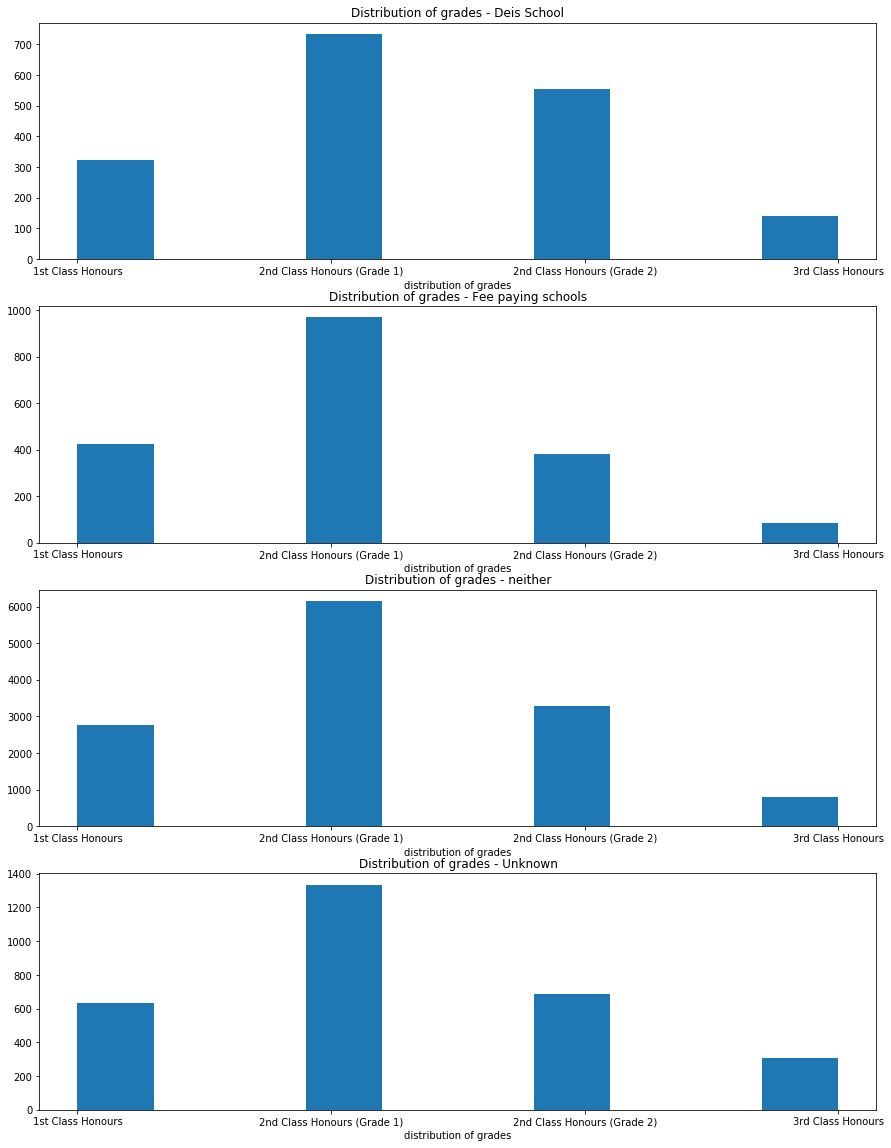

In [52]:
# Finally, type of school

deis = df2[df2['DEIS_OR_FEE_PAYING_DESC'] == 'Deis']
fee = df2[df2['DEIS_OR_FEE_PAYING_DESC'] == 'Fee Paying']
neither = df2[df2['DEIS_OR_FEE_PAYING_DESC'] == 'Neither']
unknown = df2[df2['DEIS_OR_FEE_PAYING_DESC'] == 'Unknown']



# Unknowns excluded from this 

plt.figure(figsize=(15, 20)) # This sets the size of the individual plots 

plt.subplot(4,1,1)
plt.hist(deis['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Deis School")

plt.subplot(4,1,2)
plt.hist(fee['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Fee paying schools")

plt.subplot(4,1,3)
plt.hist(neither['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - neither")

plt.subplot(4,1,4)
plt.hist(unknown['Grade Desc']) 
plt.xlabel("distribution of grades")
plt.title("Distribution of grades - Unknown")
plt.savefig('Type of School.pdf') # output plots as a single pdf

plt.savefig('Type of School Attended.pdf') # output plots as a single pdf


plt.show()

Deis get lowest proportion of firsts. Interestingly the highest prop of thirds and lowest seconds (combined) is from the "unknown" category


The final category in which we will analyse the distribution of grades is the field of study. 


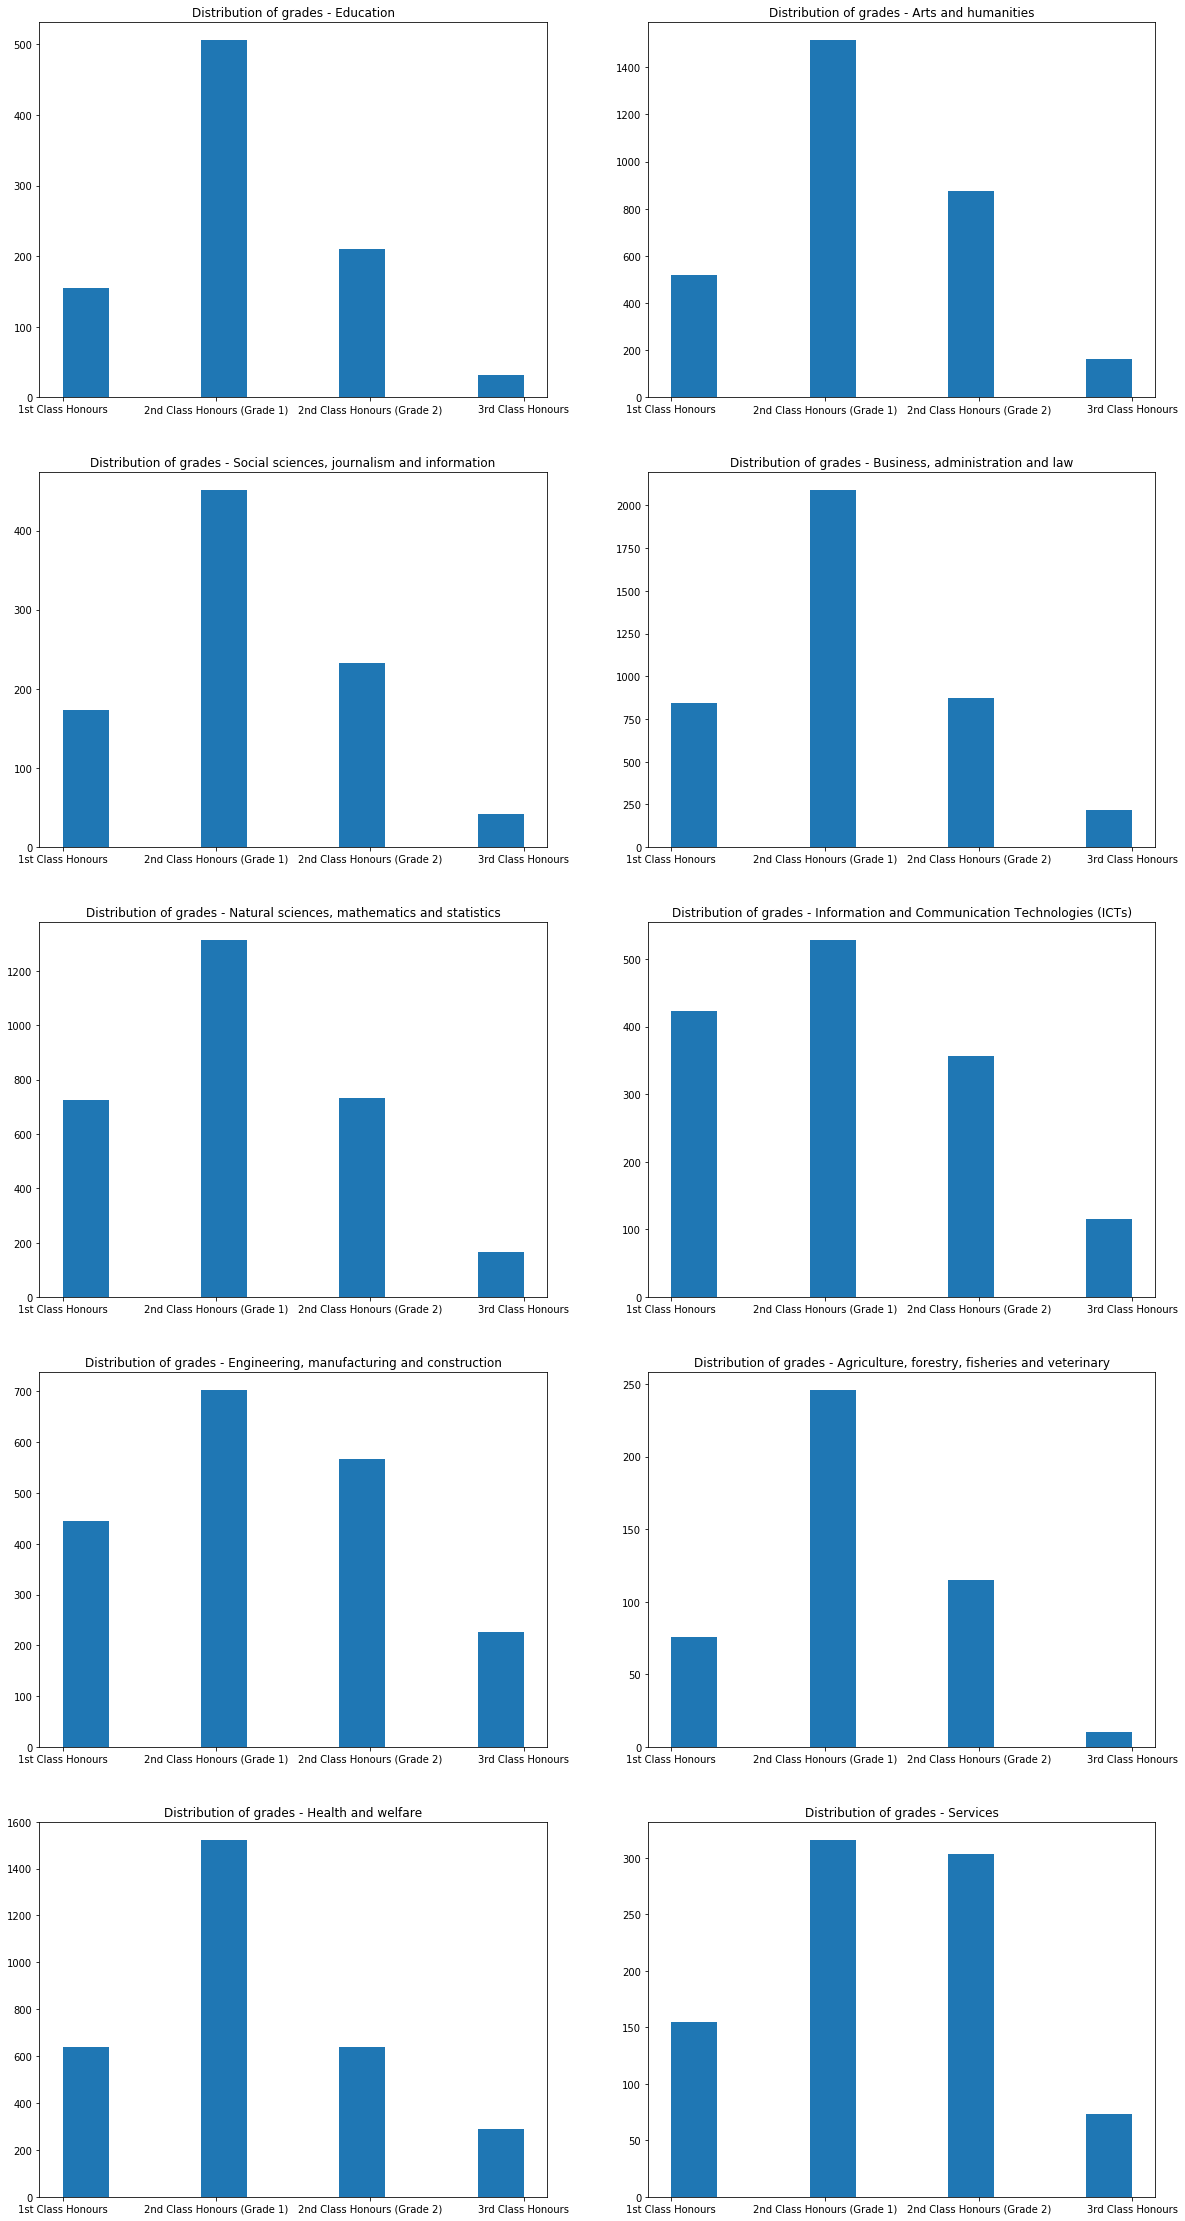

In [51]:
# Ed = Education
#  Arts = Arts and humanities
# SoSci = Social sciences, journalism and information
# bus = Business, administration and law
# Sci = Natural sciences, mathematics and statistics
# ICT = Information and Communication Technologies (ICTs)
# eng = Engineering, manufacturing and construction
# ag  = Agriculture, forestry, fisheries and veterin
# Health = Health and welfare
# Services = Services


Ed = df2[df2['Field of Study']=='Education']
Arts = df2[df2['Field of Study']=='Arts and humanities']
SoSci = df2[df2['Field of Study']=='Social sciences, journalism and information']
bus = df2[df2['Field of Study']=='Business, administration and law']
Sci = df2[df2['Field of Study']=='Natural sciences, mathematics and statistics']
ICT = df2[df2['Field of Study']=='Information and Communication Technologies (ICTs)']
eng = df2[df2['Field of Study']=='Engineering, manufacturing and construction']
ag  = df2[df2['Field of Study']=='Agriculture, forestry, fisheries and veterinary']
Health = df2[df2['Field of Study']=='Health and welfare']
Services = df2[df2['Field of Study']=='Services']

plt.figure(figsize=(20,40)) # This sets the size of the individual plots 

plt.subplot(5,2,1)
plt.hist(Ed['Grade Desc']) 
plt.title("Distribution of grades - Education")

plt.subplot(5,2,2)
plt.hist(Arts['Grade Desc']) 
plt.title("Distribution of grades - Arts and humanities")

plt.subplot(5,2,3)
plt.hist(SoSci['Grade Desc']) 
plt.title("Distribution of grades - Social sciences, journalism and information")

plt.subplot(5,2,4)
plt.hist(bus['Grade Desc']) 
plt.title("Distribution of grades - Business, administration and law")


plt.subplot(5,2,5)
plt.hist(Sci['Grade Desc']) 
plt.title("Distribution of grades - Natural sciences, mathematics and statistics")


plt.subplot(5,2,6)
plt.hist(ICT['Grade Desc'])
plt.title("Distribution of grades - Information and Communication Technologies (ICTs)")

plt.subplot(5,2,7)
plt.hist(eng['Grade Desc'])
plt.title("Distribution of grades - Engineering, manufacturing and construction")

plt.subplot(5,2,8)
plt.hist(ag['Grade Desc'])
plt.title("Distribution of grades - Agriculture, forestry, fisheries and veterinary")

plt.subplot(5,2,9)
plt.hist(Health['Grade Desc'])
plt.title("Distribution of grades - Health and welfare")

plt.subplot(5,2,10)
plt.hist(Services['Grade Desc'])
plt.title("Distribution of grades - Services")

plt.savefig('Field of Study.pdf') # output plots as a single pdf
plt.show()